You are in a city that consists of n intersections numbered from 0 to n - 1 with bi-directional roads between some intersections. The inputs are generated such that you can reach any intersection from any other intersection and that there is at most one road between any two intersections.

You are given an integer n and a 2D integer array roads where roads[i] = [ui, vi, timei] means that there is a road between intersections ui and vi that takes timei minutes to travel. You want to know in how many ways you can travel from intersection 0 to intersection n - 1 in the shortest amount of time.

Return the number of ways you can arrive at your destination in the shortest amount of time. Since the answer may be large, return it modulo 109 + 7.

 

Example 1:

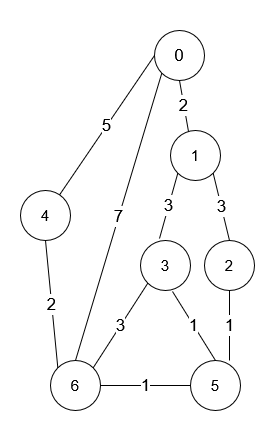

Input: n = 7, roads = [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
Output: 4
Explanation: The shortest amount of time it takes to go from intersection 0 to intersection 6 is 7 minutes.
The four ways to get there in 7 minutes are:
- 0 ➝ 6
- 0 ➝ 4 ➝ 6
- 0 ➝ 1 ➝ 2 ➝ 5 ➝ 6
- 0 ➝ 1 ➝ 3 ➝ 5 ➝ 6

Example 2:

Input: n = 2, roads = [[1,0,10]]
Output: 1
Explanation: There is only one way to go from intersection 0 to intersection 1, and it takes 10 minutes.

 

Constraints:

    1 <= n <= 200
    n - 1 <= roads.length <= n * (n - 1) / 2
    roads[i].length == 3
    0 <= ui, vi <= n - 1
    1 <= timei <= 109
    ui != vi
    There is at most one road connecting any two intersections.
    You can reach any intersection from any other intersection.



In [ ]:
class Solution:
    def countPaths(self, n: int, roads: List[List[int]]) -> int:
        MOD = 10**9 + 7
        min_dist = [float("inf")] * n
        num_ways = [0] * n
        visited = [False] * n
        min_dist[0] = 0
        num_ways[0] = 1
        graph = defaultdict(list)
        for f, t, d in roads:
            graph[f].append((t, d))
            graph[t].append((f, d))
        q = [(0, 0)]
        while q:
            dist, node = heapq.heappop(q)
            if visited[node]:
                continue
            visited[node] = True
            for nxt, diff in graph[node]:
                if dist + diff < min_dist[nxt]:
                    min_dist[nxt] = dist + diff
                    num_ways[nxt] = num_ways[node]
                elif dist + diff == min_dist[nxt]:
                    num_ways[nxt] += num_ways[node]
                else:
                    continue
                num_ways[nxt] %= MOD
                heapq.heappush(q, (dist + diff, nxt))
        return num_ways[-1]

In [ ]:
class Solution:
    MOD = 1_000_000_007

    def countPaths(self, n: int, roads: list[list[int]]) -> int:
        # dp[src][dest][0] stores the minimum time between src and dest
        # dp[src][dest][1] stores the number of ways to reach dest from src
        # with the minimum time
        dp = [[[0, 0] for _ in range(n)] for _ in range(n)]

        # Initialize the dp table
        for src in range(n):
            for dest in range(n):
                if src != dest:
                    # Set a large initial time
                    dp[src][dest][0] = int(1e12)
                    # No paths yet
                    dp[src][dest][1] = 0
                else:
                    # Distance from a node to itself is 0
                    dp[src][dest][0] = 0
                    # Only one trivial way (staying at the node)
                    dp[src][dest][1] = 1

        # Initialize direct roads from the input
        for start_node, end_node, travel_time in roads:
            dp[start_node][end_node][0] = travel_time
            dp[end_node][start_node][0] = travel_time
            # There is one direct path
            dp[start_node][end_node][1] = 1
            # Since the roads are bidirectional
            dp[end_node][start_node][1] = 1

        # Apply the Floyd-Warshall algorithm to compute shortest paths
        # Intermediate node
        for mid in range(n):
            # Starting node
            for src in range(n):
                # Destination node
                for dest in range(n):
                    # Avoid self-loops
                    if src != mid and dest != mid:
                        new_time = dp[src][mid][0] + dp[mid][dest][0]

                        if new_time < dp[src][dest][0]:
                            # Found a shorter path
                            dp[src][dest][0] = new_time
                            dp[src][dest][1] = (
                                dp[src][mid][1] * dp[mid][dest][1]
                            ) % self.MOD
                        elif new_time == dp[src][dest][0]:

                            # Another way to achieve the same shortest time
                            dp[src][dest][1] = (
                                dp[src][dest][1]
                                + dp[src][mid][1] * dp[mid][dest][1]
                            ) % self.MOD

        # Return the number of shortest paths from node (n-1) to node 0
        return dp[n - 1][0][1]